In [1]:
import oceanspy as ospy
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# Load data
path = [
    r'D:\MScData\model_69_section.nc',
    r'D:\MScData\model_70_section.nc',
    r'D:\MScData\model_71_section.nc',
    r'D:\MScData\model_72_section.nc',
    r'D:\MScData\model_735_section.nc',
    r'D:\MScData\model_75_section.nc'

]
model_data = [xr.open_dataset(x) for x in path]

path = [
    r'D:\MScData\AL_69.nc',
    r'D:\MScData\AL_70.nc',
    r'D:\MScData\AL_71.nc',
    r'D:\MScData\AL_72.nc',
    r'D:\MScData\AL_735.nc',
    r'D:\MScData\AL_75.nc'
]
obs_data = [xr.open_dataset(x) for x in path]
vertical_res = xr.open_dataset(r'D:\MScData\drF.nc')['drF']

In [3]:
display(obs_data[0])

<xarray.Dataset>
Dimensions:       (index: 22, pressure_dim: 3790)
Coordinates:
  * index         (index) int64 585 622 691 718 761 ... 1064 1132 1155 1211 1241
  * pressure_dim  (pressure_dim) int32 0 1 2 3 4 5 ... 3785 3786 3787 3788 3789
Data variables:
    pressure      (index, pressure_dim) float64 ...
    temperature   (index, pressure_dim) float64 ...
    salinity      (index, pressure_dim) float64 ...
    longitude     (index) float64 ...
    latitude      (index) float64 ...
    time          (index) datetime64[ns] ...
    source        (index) object ...
    SA            (index, pressure_dim) float64 ...

In [4]:
display(model_data[0])

<xarray.Dataset>
Dimensions:            (station: 22, Z: 216, Zp1: 217, Zu: 216, Zl: 216,
                        time: 1460, time_midp: 1459, station_midp: 21)
Coordinates:
    lat                (station) float64 ...
    lon                (station) float64 ...
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl                 (Zl) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
  * time               (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
  * time_midp          (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 201...
  * station            (station) int64 0 1 2 3 4 5 6 7 ... 15 16 17 18 19 20 21
    station_dist       (station) float64 ...
  * station_midp       (station_midp) float64 0.5 1.5 2.5 3.5 ... 18.5 19.5 20.5
    station_midp_dist  (station_midp) float64 ...
Data variables:
    XC                 (station) float64 ...
    YC                 (station) float64 ...
    XG                 (station) float64 ...
    YG                 (station) float64 ...
    Temp               (time, Z, station) float64 ...
    S                  (time, Z, station) float64 ...
    YU                 (station) float64 ...
    XU                 (station) float64 ...
    YV                 (station) float64 ...
    XV                 (station) float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl': -...
    OceanSpy_grid_periodic:  []

Text(0.5, 1.0, 'Observations')

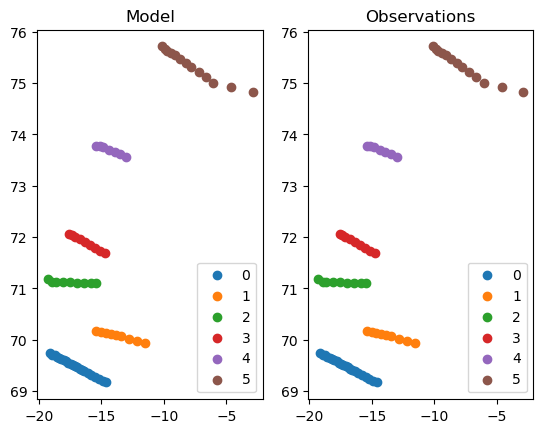

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2)
for x,data in enumerate(model_data):
    ax1.scatter(data.lon,data.lat,label=x)
ax1.legend()
ax1.set_title('Model')

for x,data in enumerate(obs_data):
    ax2.scatter(data.longitude,data.latitude,label=x)
ax2.legend()
ax2.set_title('Observations')

Text(0.5, 1.0, 'Model')

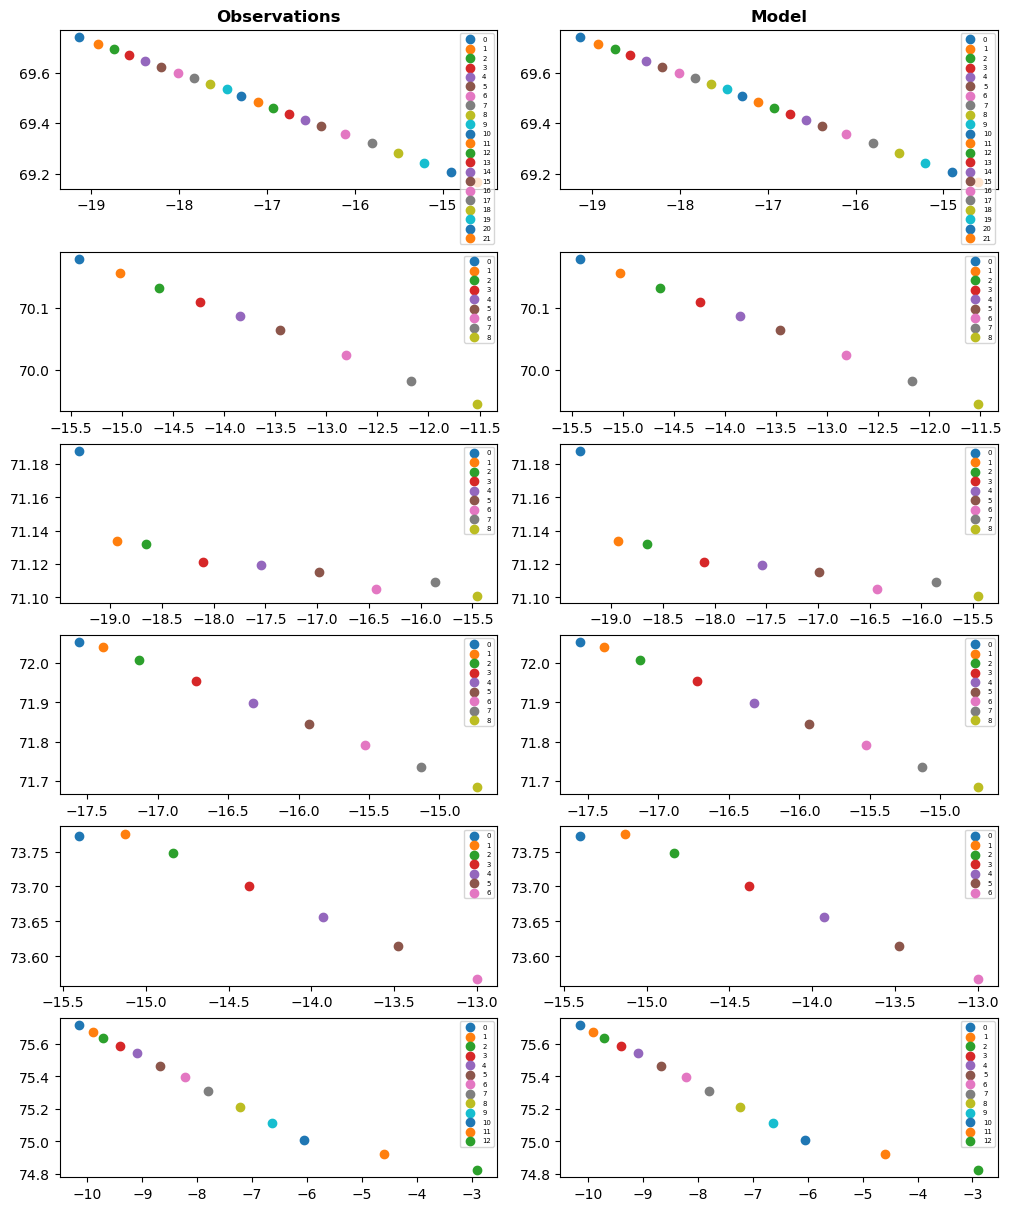

In [6]:
fig, axs = plt.subplot_mosaic([[0,1],
                               [2,3],
                               [4,5],
                               [6,7],
                               [8,9],
                               [10,11]],
                               figsize=(10,12), layout='constrained')
num = [1,3,5,7,9,11]
for x, data in enumerate(obs_data):
    for i in range(len(data.longitude)):
        axs[x*2].scatter(data.longitude[i],data.latitude[i],label=i)
        axs[x*2].legend(prop={"size": 5})
axs[0].set_title('Observations',fontweight='bold')

for x, data in enumerate(model_data):
    for i in range(len(data.station)):
        axs[num[x]].scatter(data.lon[i],data.lat[i],label=i)
        axs[num[x]].legend(prop={"size": 5})
axs[1].set_title('Model',fontweight='bold')

In [7]:
display(vertical_res)

<xarray.DataArray 'drF' (Z: 216)>
[216 values with dtype=float64]
Coordinates:
  * Z        (Z) float64 -1.0 -3.5 -7.0 ... -3.904e+03 -3.922e+03 -3.942e+03
Attributes:
    description:    r cell face separation
    standard_name:  cell_z_size
    long_name:      cell z size
    units:          m

Text(0.5, 1.0, 'Model vertical resolution')

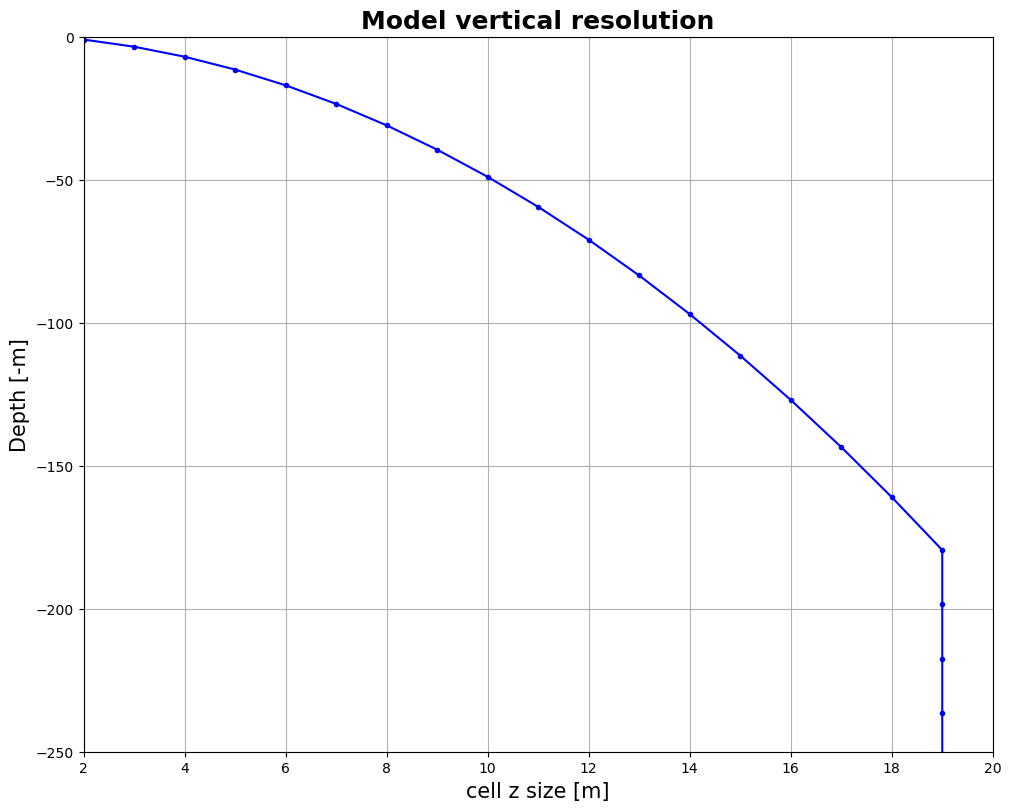

In [8]:
fig, ax = plt.subplots(figsize=(10,8),layout='constrained')
ax.plot(vertical_res,vertical_res.Z,'b.-')
ax.set_ylim(-250,0)
ax.set_xlim(2,20)
ax.grid()
ax.set_xlabel('cell z size [m]',fontsize=15)
ax.set_ylabel('Depth [-m]',fontsize=15)
ax.set_title('Model vertical resolution',fontweight='bold',fontsize=18)

In [9]:
time_fix_model = []
for i,j in zip(model_data,obs_data):
    sec = []
    model = i
    for x, station_time in enumerate(j.time):
        sec.append(model.sel(station=x).sel(time=station_time,method='nearest'))
    time_fix_model.append(sec)

In [10]:
display(time_fix_model[4][0])
display(obs_data[4].time[0].values)

<xarray.Dataset>
Dimensions:            (Z: 216, Zp1: 217, Zu: 216, Zl: 216, time_midp: 1459,
                        station_midp: 6)
Coordinates: (12/13)
    lat                float64 73.77
    lon                float64 -15.4
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
  * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
  * Zl                 (Zl) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
    ...                 ...
  * time_midp          (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 201...
    station            int64 0
    station_dist       float64 ...
  * station_midp       (station_midp) float64 0.5 1.5 2.5 3.5 4.5 5.5
    station_midp_dist  (station_midp) float64 ...
    index              int64 1144
Data variables:
    XC                 float64 ...
    YC                 float64 ...
    XG                 float64 ...
    YG                 float64 ...
    Temp               (Z) float64 ...
    S                  (Z) float64 ...
    YU                 float64 ...
    XU                 float64 ...
    YV                 float64 ...
    XV                 float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl': -...
    OceanSpy_grid_periodic:  []

numpy.datetime64('2018-03-12T11:54:00.000001000')

In [11]:
display(time_fix_model[0][0].S)

<xarray.DataArray 'S' (Z: 216)>
[216 values with dtype=float64]
Coordinates:
    lat           float64 69.74
    lon           float64 -19.13
  * Z             (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
    time          datetime64[ns] 2018-02-14T18:00:00
    station       int64 0
    station_dist  float64 ...
    index         int64 585
Attributes:
    long_name:      salinity
    standard_name:  sea_water_salinity
    units:          g kg-1
    _coordinates:   XC YC RC iter

In [12]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, r'C:\Users\eirik\Master\FreshWater')
from FW import FWC

In [13]:
modelFWC = FWC(model=True,data=time_fix_model,ref_salinity=34.9)
obsFWC = FWC(obs=True,data=obs_data,ref_salinity=34.9)

In [14]:
display(len(modelFWC),len(modelFWC[0]))
display(modelFWC[0][0].max())

6

22

<xarray.DataArray 'S' ()>
array(0.29458796)
Coordinates:
    lat           float64 69.74
    lon           float64 -19.13
    time          datetime64[ns] 2018-02-14T18:00:00
    station       int64 0
    station_dist  float64 ...
    index         int64 585

In [18]:
display(len(obsFWC),len(obsFWC[0]))
display(obsFWC[0][0].max(), obsFWC[0][0].values)

6

22

<xarray.DataArray 'SA' ()>
array(0.22689073)
Coordinates:
    index    int64 585

array([ 0.00506745,  0.01008454,  0.01502421, ..., -0.74337119,
       -0.74337119, -0.74337119])

# Root Mean Square Error (RMSE)

In [16]:
diff = []
for x,y in zip(modelFWC,obsFWC):
    for i,j in zip(x,y):
        diff.append((i.max().values-j.max().values)**2)

RMSE = np.sqrt(np.sum(diff)/len(diff))
print(len(diff),sum(diff))
print('RMSE: ',RMSE)

69 3.9433803228829944
RMSE:  0.23906158089929963
